<a href="https://colab.research.google.com/github/NiharikaGanji07/Niharika_INFO5731_Spring2021/blob/main/In_Class_exercises_10/In_Class_exercises_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# In class exercise 10 (20 points in total, 4/16/2021)

The purpose of the exercise is to practice different machine learning algorithms for text clustering
Please downlad the dataset by using the following link.  https://www.kaggle.com/PromptCloudHQ/amazon-reviews-unlocked-mobile-phones
(You can also use different text data which you want)

Apply the listed clustering methods to the dataset:

K means, 
DBSCAN,
Hierarchical clustering. 

You can refer to of the codes from  the follwing link below. 
https://www.kaggle.com/karthik3890/text-clustering 
    

In [1]:
#Write your code here.
import nltk
nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> all
       | 
       | Downloading package abc to /root/nltk_data...
       |   Unzipping corpora/abc.zip.
       | Downloading package alpino to /root/nltk_data...
       |   Unzipping corpora/alpino.zip.
       | Downloading package biocreative_ppi to /root/nltk_data...
       |   Unzipping corpora/biocreative_ppi.zip.
       | Downloading package brown to /root/nltk_data...
       |   Unzipping corpora/brown.zip.
       | Downloading package brown_tei to /root/nltk_data...
       |   Unzipping corpora/brown_tei.zip.
       | Downloading package cess_cat to /root/nltk_data...
       |   Unzipping corpora/cess_cat.zip.
       | Downloading package cess_esp to /root/nltk_data...
 

True

(5000, 6)
(3422, 6)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


positive    2522
negative     900
Name: Rating, dtype: int64

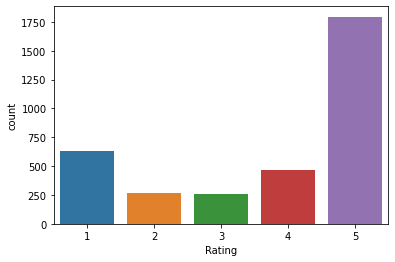

In [6]:
import pandas as pd
amazon_review = pd.read_csv("/content/Amazon_Unlocked_Mobile.csv")
amazon_review = amazon_review.head(5000)
print(amazon_review.shape)
AfterRemoving_NullValues = amazon_review.dropna()
print(AfterRemoving_NullValues.shape)
import seaborn as sns
sns.countplot(AfterRemoving_NullValues.Rating)
#classifying
def Classification_review(rating):
    if rating < 3:
        return 'negative'
    return 'positive'

Classification_rating = AfterRemoving_NullValues['Rating'].map(Classification_review) 
AfterRemoving_NullValues['Rating'] = Classification_rating
AfterRemoving_NullValues['Rating'].value_counts()


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


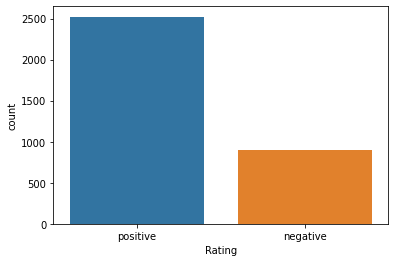

In [7]:
#visualizing
import seaborn as sns
sns.countplot(AfterRemoving_NullValues.Rating)

In [8]:
#pre processing
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')
import re
c=0;
for i in AfterRemoving_NullValues['Reviews'].values:
    if (len(re.findall('<.*?>', i))):
        print(c)
        print(i)
        break;
    c += 1;

def html(sentence):
    cleaned= re.compile('<.*?>')
    cleaned_text = re.sub(cleaned, ' ', sentence)
    return cleaned_text
#lower case
AfterRemoving_NullValues['After Lowercasing'] = AfterRemoving_NullValues['Reviews'].apply(lambda x: " ".join(x.lower() for x in x.split()))
#clean html
AfterRemoving_NullValues['After Cleaning HTML'] = AfterRemoving_NullValues['After Lowercasing'].apply(lambda x: html(x))
#Removing special charachters
AfterRemoving_NullValues['Cleaned Text'] = AfterRemoving_NullValues['After Cleaning HTML'].apply(lambda x: ''.join(re.sub(r"[^a-zA-Z0-9]+", ' ', charctr) for charctr in x ))
#stop words removal
AfterRemoving_NullValues['Cleaned Text'] = AfterRemoving_NullValues['Cleaned Text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
3205
Unless you know how to jail break this phone... what's the point? Most apps don't support this old phone. <(it's not really old, they just want you to spend money on the newer version. wtf? but whatever)>


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

In [9]:
#k means
from sklearn.feature_extraction.text import CountVectorizer
vector_count = CountVectorizer()
counted = vector_count.fit_transform(AfterRemoving_NullValues['Cleaned Text'].values)
column_names = vector_count.get_feature_names()
from sklearn.cluster import KMeans
model = KMeans(n_clusters = 10, init='k-means++', n_jobs = -1, random_state=99)
model.fit(counted)

label = model.labels_
cc = model.cluster_centers_
print(cc)

from sklearn import metrics
ss = metrics.silhouette_score(counted, label, metric='euclidean')
print(ss)

data_frame = AfterRemoving_NullValues
data_frame['Bow Clus Label'] = model.labels_
data_frame.groupby(['Bow Clus Label'])['Reviews'].count()

[[2.05479452e-02 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 6.84931507e-03]
 [2.63059000e-03 0.00000000e+00 7.51597144e-04 ... 1.50319429e-03
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 1.00000000e+00]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]
0.35392908766809134


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Bow Clus Label
0     146
1    2661
2       1
3      36
4      21
5     548
6       2
7       3
8       2
9       2
Name: Reviews, dtype: int64

cluster ranking per each term
Cluster 0: phone
 good
 screen
 use
 great
 one
 like
 battery
 really
 sim
Cluster 1: phone
 great
 good
 screen
 works
 price
 work
 like
 one
 love
Cluster 2: idol
 sound
 light
 like
 screen
 bass
 even
 5s
 version
 day
Cluster 3: phone
 screen
 good
 camera
 like
 battery
 one
 use
 idol
 great
Cluster 4: phone
 screen
 one
 like
 good
 camera
 would
 use
 phones
 get
Cluster 5: phone
 screen
 great
 good
 one
 would
 like
 price
 get
 battery
Cluster 6: phone
 camera
 tracfone
 idol
 data
 one
 use
 screen
 like
 time
Cluster 7: carrier
 iphone
 phone
 purchase
 compatible
 card
 unlocked
 sim
 provider
 purchased
Cluster 8: phone
 like
 good
 quality
 one
 camera
 really
 moto
 phones
 screen
Cluster 9: phone
 camera
 like
 great
 screen
 really
 price
 app
 use
 better


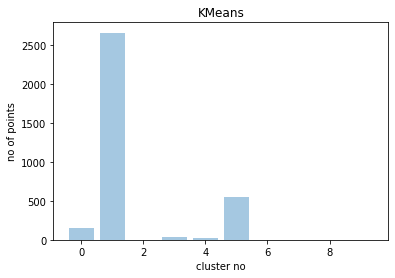

In [10]:
print("cluster ranking per each term")
order = model.cluster_centers_.argsort()[:, ::-1]
terms_count = vector_count.get_feature_names()
for i in range(10):
    print("Cluster %d:" % i, end='')
    for ind in order[i, :10]:
        print(' %s' % terms_count[ind], end='')
        print()

import matplotlib.pyplot as plt
plt.bar([x for x in range(10)], data_frame.groupby(['Bow Clus Label'])['Reviews'].count(), alpha = 0.4)
plt.title('KMeans')
plt.xlabel("cluster no")
plt.ylabel("no of points")
plt.show()

In [11]:
l = []
for i in AfterRemoving_NullValues['Cleaned Text'].values:
    l.append(i.split())

import gensim
w_v_model=gensim.models.Word2Vec(l,size=100, workers=4)


import numpy as np
vector_sentence = []
for i in l:
  sentence_vector = np.zeros(100)
  count = 0
  for word in i:
    try:
      vec = w_v_model.wv[word]
      sentence_vector += vec
      count += 1
    except:
      pass
  sentence_vector /= count
  vector_sentence.append(sentence_vector)
vector_sentence = np.array(vector_sentence)
vector_sentence = np.nan_to_num(vector_sentence)
vector_sentence.shape

num_clus = [x for x in range(3,11)]
num_clus


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in true_divide


[3, 4, 5, 6, 7, 8, 9, 10]

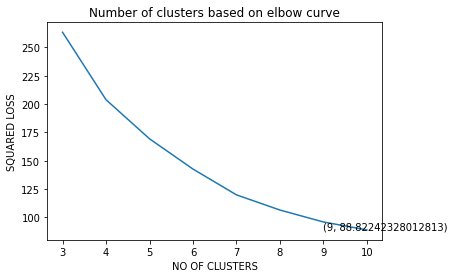

minimal number of clusters obtained is -  9
Loss for each minimal cluster is -  88.82242328012813


In [12]:
error= []
for i in num_clus:
    kmeans = KMeans(n_clusters = i).fit(vector_sentence)
    error.append(kmeans.inertia_)
    
minimal_cluster = np.argmin(error) + 2 
plt.plot(num_clus, error)
plt.title("Number of clusters based on elbow curve")
plt.xlabel("NO OF CLUSTERS")
plt.ylabel("SQUARED LOSS")
xy = (minimal_cluster, min(error))
plt.annotate('(%s, %s)' % xy, xy = xy, textcoords='data')
plt.show()

print ("minimal number of clusters obtained is - ", minimal_cluster)
print ("Loss for each minimal cluster is - ", min(error))

In [19]:
from sklearn.cluster import KMeans
model_2 = KMeans(n_clusters = minimal_cluster)
model_2.fit(vector_sentence)

cluster_pred = model_2.predict(vector_sentence)
cluster_pred_model_2 = model_2.labels_
cluster_center = model_2.cluster_centers_
cluster_center[1:2]


for i in range(4):
    print("A review of assigned to cluster ", i)
    print("-" * 70)
    print(data_frame.iloc[data_frame.groupby(['AVG-W2V Clus Label']).groups[i][0]]['Reviews'])
    print('\n')
    print(data_frame.iloc[data_frame.groupby(['AVG-W2V Clus Label']).groups[i][1]]['Reviews'])
    print('\n')
    print("_" * 70)

A review of assigned to cluster  0
----------------------------------------------------------------------
I feel so LUCKY to have found this used (phone to us & not used hard at all), phone on line from someone who upgraded and sold this one. My Son liked his old one that finally fell apart after 2.5+ years and didn't want an upgrade!! Thank you Seller, we really appreciate it & your honesty re: said used phone.I recommend this seller very highly & would but from them again!!


nice phone, nice up grade from my pantach revue. Very clean set up and easy set up. never had an android phone but they are fantastic to say the least. perfect size for surfing and social media. great phone samsung


______________________________________________________________________
A review of assigned to cluster  1
----------------------------------------------------------------------
Very pleased


The charging port was loose. I got that soldered in. Then needed a new battery as well. $100 later (not incl

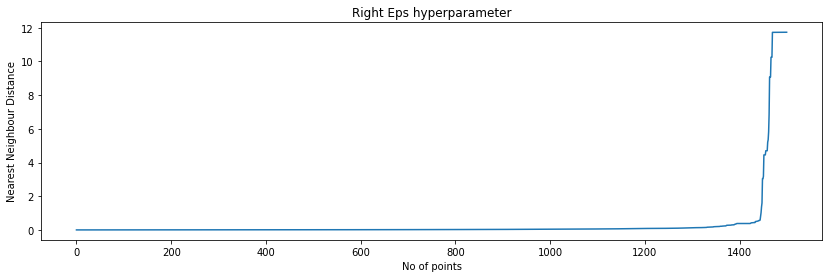

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:46: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


,Product Name,Brand Name,Reviews
AVG-W2V Clus Label,,,
0,3422,3422,3422


In [15]:
#DBSCAN CLUSTERING

from sklearn.cluster import DBSCAN
minPts = 2 * 100
def lower_bound(nums, target):
    l, r = 0, len(nums) - 1
    while l <= r:
        mid = int(l + (r - l) / 2)
        if nums[mid] >= target:
            r = mid - 1
        else:
            l = mid + 1
    return l

def neighbour_nearest(x, data):
    dists = []
    for val in data:
        dist = np.sum((x - val) **2 )
        if(len(dists) == 200 and dists[199] > dist):
            l = int(lower_bound(dists, dist))
            if l < 200 and l >= 0 and dists[l] > dist:
                dists[l] = dist
        else:
            dists.append(dist)
            dists.sort()
    
    return dists[199]

neighbour = []
for i in vector_sentence[:1500]:
    neighbour.append( neighbour_nearest(i, vector_sentence[:1500]) )
neighbour.sort()

plt.figure(figsize=(14,4))
plt.title("Right Eps hyperparameter")
plt.plot([x for x in range(len(neighbour))], neighbour)
plt.xlabel("No of points")
plt.ylabel("Nearest Neighbour Distance")
plt.show()

model_1 = DBSCAN(eps = 5, min_samples = minPts, n_jobs=-1)
model_1.fit(vector_sentence)

dbscan_cluster = data_frame
dbscan_cluster['AVG-W2V Clus Label'] = model_1.labels_
dbscan_cluster.groupby(['AVG-W2V Clus Label'])['Product Name', 'Brand Name', 'Reviews'].count()

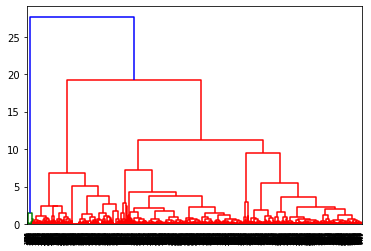

In [16]:
#Hierarchical clustering
import scipy
from scipy.cluster import hierarchy
hirera_cluster=hierarchy.dendrogram(hierarchy.linkage(vector_sentence, method='ward'))
plt.axhline(y=35)

In [24]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
Agg=cluster.fit_predict(vector_sentence)

hier_cluster = dbscan_cluster
hier_cluster['AVG-W2V Clus Label'] = cluster.labels_

hier_cluster.groupby(['AVG-W2V Clus Label'])['Reviews'].count()

for i in range(5):
    print("2 reviews of assigned to cluster ", i)
    print("-" * 70)
    print(hier_cluster.iloc[hier_cluster.groupby(['AVG-W2V Clus Label']).groups[i][0]]['Reviews'])
    print('\n')
    print(hier_cluster.iloc[hier_cluster.groupby(['AVG-W2V Clus Label']).groups[i][1]]['Reviews'])
    print('\n')
    print("_" * 70)

2 reviews of assigned to cluster  0
----------------------------------------------------------------------
I feel so LUCKY to have found this used (phone to us & not used hard at all), phone on line from someone who upgraded and sold this one. My Son liked his old one that finally fell apart after 2.5+ years and didn't want an upgrade!! Thank you Seller, we really appreciate it & your honesty re: said used phone.I recommend this seller very highly & would but from them again!!


nice phone, nice up grade from my pantach revue. Very clean set up and easy set up. never had an android phone but they are fantastic to say the least. perfect size for surfing and social media. great phone samsung


______________________________________________________________________
2 reviews of assigned to cluster  1
----------------------------------------------------------------------
Very pleased


The charging port was loose. I got that soldered in. Then needed a new battery as well. $100 later (not in

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In one paragraph, please compare K means, DBSCAN and Hierarchical clustering. 

In [ ]:
#You can write you answer here.
"""Clustering is an unsupervised machine learning technique that groups data points into clusters based on how similar the data points in the dataset are in terms of details. 
Data points from the same clusters are identical in certain cases, while data objects from different clusters are dissimilar.

K-means is a centroid-based or partition-based clustering algorithm.  
This algorithm partitions all the points in the sample space into K groups of similarity. 
The similarity is usually measured using Euclidian Distance .

DBScan is a density-based clustering algorithm. 
The key fact of this algorithm is that the neighbourhood of each point in a cluster which is within a given radius (R) must have a minimum number of points (M). 
This algorithm has proved extremely efficient in detecting outliers and handling noise. 

Hierarchical clustering, as the name suggests is an algorithm that builds hierarchy of clusters. 
This algorithm starts with all the data points assigned to a cluster of their own. 
Then two nearest clusters are merged into the same cluster. In the end, this algorithm terminates when there is only a single cluster left.

K means is the best one to classify the reviews and this provides the most efficient reslut for the data set. 
A conclusion can be made that K-means is the optimal solution because there is more noise in hierarchical clustering."""